# Taller 3: Segmentación

## Cargue la imagen de trabajo y visualícela.

In [1]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_baboon = cv2.imread(PATH +'baboon.png', cv2.IMREAD_GRAYSCALE)

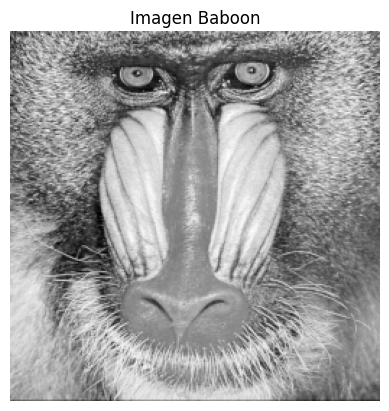

In [3]:
plt.imshow(imagen_baboon, cmap='gray')
plt.title('Imagen Baboon')
plt.axis('off')
plt.show()

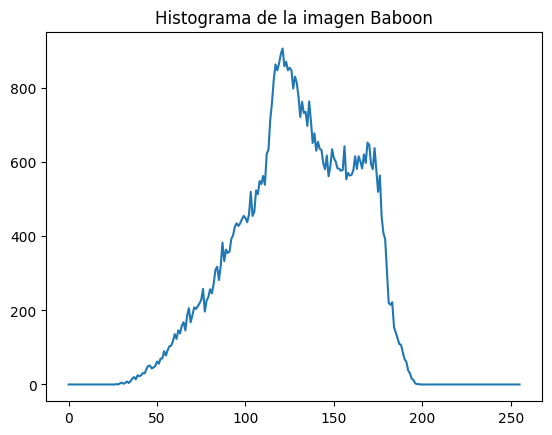

In [4]:
histogram_baboon = cv2.calcHist([imagen_baboon], [0], None, [256], [0, 256])
plt.plot(histogram_baboon)
plt.title('Histograma de la imagen Baboon')
plt.show()

## Aplique el algoritmo de K-means para segmentar por agrupación. Utilice un valor de K=3. Visualice los resultados.

In [8]:
#!pip install scikit-learn

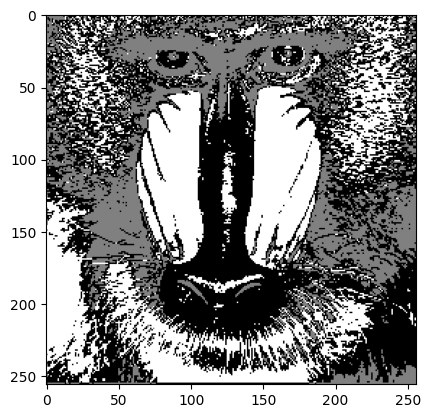

In [17]:
from sklearn.cluster import KMeans

N, M = imagen_baboon.shape

img_flat = imagen_baboon.reshape(N*M ,1)
model_kmeans = KMeans(n_clusters=3, random_state=29)
segmented_image = model_kmeans.fit(img_flat)

labels = model_kmeans.labels_

segmented_image = labels.reshape(N, M)

plt.imshow(segmented_image, cmap="gray")
plt.show()


## Utilice el método del codo para encontrar el valor óptimo de grupos en la imagen. Visualice los resultados ¿Cómo cambia la segmentación?

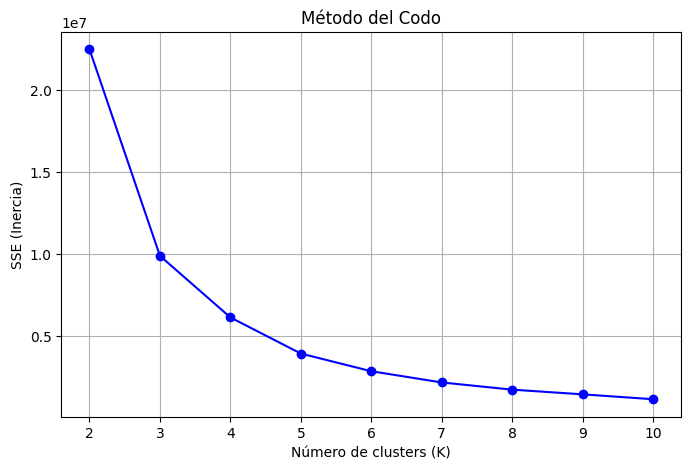

In [18]:
N, M = imagen_baboon.shape
img_flat = imagen_baboon.reshape(N * M, 1)

# Método del codo
k_values = range(2, 11)
sse = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=29)
    model.fit(img_flat)
    sse.append(model.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), sse, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

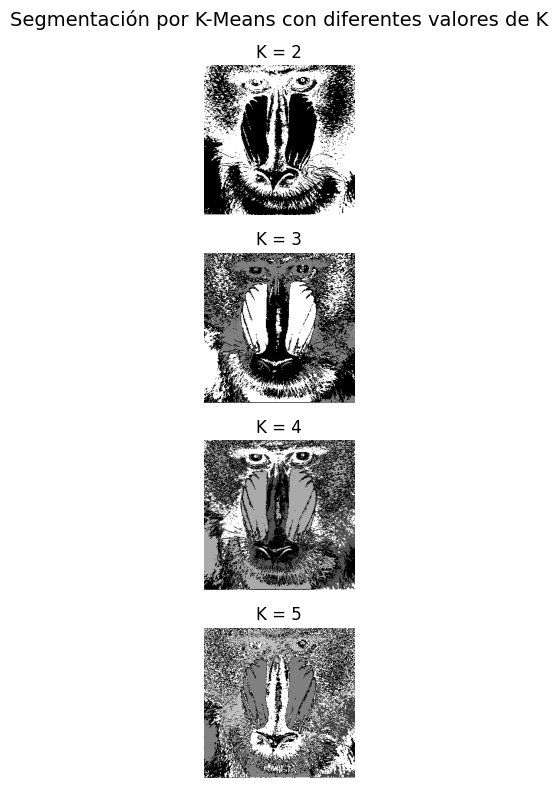

In [20]:
# Visualizar segmentación con diferentes valores de K
k_optimos = [2, 3, 4, 5]

fig, axs = plt.subplots(4, 1, figsize=(12, 8))

for i, k in enumerate(k_optimos):
    model = KMeans(n_clusters=k, random_state=29)
    model.fit(img_flat)
    labels = model.labels_.reshape(N, M)
    
    axs[i].imshow(labels, cmap='gray')
    axs[i].set_title(f'K = {k}')
    axs[i].axis('off')

plt.suptitle('Segmentación por K-Means con diferentes valores de K', fontsize=14)
plt.tight_layout()
plt.show()

Al aumentar el número de K, aumenta el número de valores posibles para la segmentación. Por ejemplo, con K=2 solo tenemos blanco y negro, mientras K=3 agrega una intesidad adicional. Esto permite obtener más detalles de la imagen en la segmentación y aumentar el contraste. Pero después de cierto valor de K, en el caso de nuestro ejercicio K=5, empeora la segmentación. Podríamos decir que con el análisis visual y el método del codo, el valor óptimo de K es 4.

## Aplique el algoritmo de súperpixeles SLIC. Utilice un valor de K=25. Visualice los resultados. ¿Cuántos súperpixeles se encontraron?

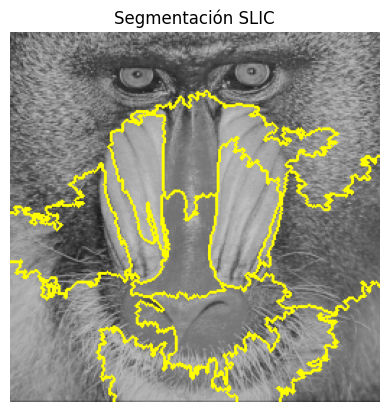

In [ ]:
from skimage.segmentation import slic
from skimage import segmentation
import matplotlib.pyplot as plt
import cv2

segments = slic(cv2.merge([imagen_baboon, imagen_baboon, imagen_baboon]), n_segments=25)
#Visualización de los súperpixeles superpuestos en la imagen
plt.imshow(segmentation.mark_boundaries(imagen_baboon, segments))
plt.title('Segmentación SLIC')
plt.axis('off')
plt.show()

In [26]:
## valores unicos de np array segments
unique_segments = np.unique(segments)
print(f"Número de segmentos únicos: {len(unique_segments)}")

Número de segmentos únicos: 12


Se aplicó el algoritmo SLIC con un valor deseado de K=25 súper-píxeles. El número de súper-píxeles encontrados fue de 12, que puede diferir del valor solicitado ya que SLIC utiliza el parámetro `n_segments` como una aproximación. El algoritmo agrupa píxeles considerando tanto su similitud en intensidad como su proximidad espacial, generando regiones compactas y homogéneas que respetan los bordes de la imagen.

## Aplique el algoritmo de súperpixeles usando el valor óptimo de grupos calculado en el paso 4. Utilice dicho multiplicado por 4 y por 10. Visualice los resultados ¿Qué puede observar? ¿Qué diferencias hay entre las imágenes generadas? 

En nuesto caso, el valor óptimo fue K=4.

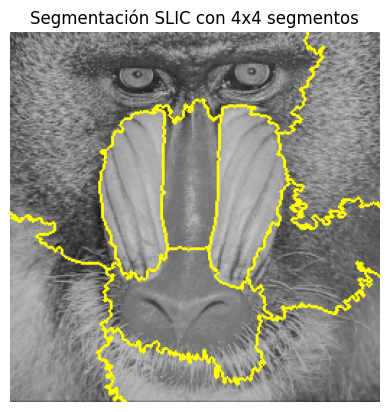

In [27]:
segments_x_4 = slic(cv2.merge([imagen_baboon, imagen_baboon, imagen_baboon]), n_segments=4*4)
#Visualización de los súperpixeles superpuestos en la imagen
plt.imshow(segmentation.mark_boundaries(imagen_baboon, segments_x_4))
plt.title('Segmentación SLIC con 4x4 segmentos')
plt.axis('off')
plt.show()

In [28]:
print(f"Número de segmentos únicos con 4x4: {len(np.unique(segments_x_4))}")

Número de segmentos únicos con 4x4: 9


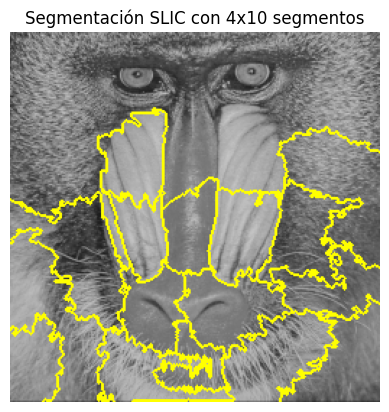

In [29]:
segments_x_10 = slic(cv2.merge([imagen_baboon, imagen_baboon, imagen_baboon]), n_segments=4*10)
#Visualización de los súperpixeles superpuestos en la imagen
plt.imshow(segmentation.mark_boundaries(imagen_baboon, segments_x_10))
plt.title('Segmentación SLIC con 4x10 segmentos')
plt.axis('off')
plt.show()

In [30]:
print(f"Número de segmentos únicos con 4x10: {len(np.unique(segments_x_10))}")

Número de segmentos únicos con 4x10: 17


La principal diferencia entre ambas segmentaciones es el nivel de detalle: a mayor número de segmentos solicitados, los súper-píxeles son más pequeños y se adaptan mejor a las variaciones locales de la imagen. Sin embargo, con pocos segmentos se obtiene una representación más compacta y simplificada de las regiones principales, lo cual puede ser más útil para tareas donde se busca identificar las zonas dominantes de la imagen sin exceso de detalle.

## ¿Cuál es la diferencia entre las dos técnicas de segmentación por agrupación utilizadas? ¿Cuál presenta el mejor resultado?  ¿Conclusión?

La principal diferencia entre K-Means y SLIC es que K-Means agrupa los píxeles únicamente por su intensidad, sin importar su ubicación en la imagen, mientras que SLIC agrupa considerando tanto la intensidad como la proximidad espacial, generando regiones compactas que se asocian más a la naturaleza de la imagen.


Esto hace que los resultados de ambos métodos sean difíciles de comparar directamente porque cada técnica puede ser más útil dependiendo del propósito: K-Means es más adecuado para clasificar zonas por niveles de intensidad (por ejemplo, separar fondo de objetos), mientras que SLIC es más útil para preservar la estructura y los bordes de la imagen.


En conclusión, no hay un método universalmente mejor. La elección depende de la aplicación.